In [1]:
import keras
import keras.backend as k
from keras.models import Sequential
from keras.layers import Dense, Dropout
import pandas as pd
import numpy as np

Using TensorFlow backend.


In [2]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
data = pd.read_csv('titanic.csv')
data.head()

,Survived,Pclass,Name,Sex,Age,Siblings/Spouses Aboard,Parents/Children Aboard,Fare
0,0,3,Mr. Owen Harris Braund,1,22.0,1,0,7.2500
1,1,1,Mrs. John Bradley (Florence Briggs Thayer) Cum...,0,38.0,1,0,71.2833
2,1,3,Miss. Laina Heikkinen,0,26.0,0,0,7.9250
3,1,1,Mrs. Jacques Heath (Lily May Peel) Futrelle,0,35.0,1,0,53.1000
4,0,3,Mr. William Henry Allen,1,35.0,0,0,8.0500


In [4]:
data.isnull().values.any()

False

Text(0.5, 1.0, 'count plot')

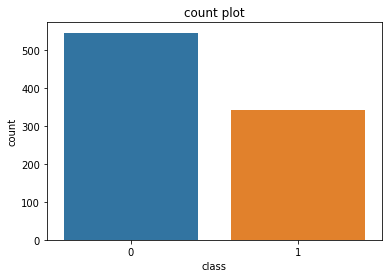

In [5]:
sns.set_style()
sns.countplot(x='Survived', data=data)
plt.xlabel('class')
plt.ylabel('count')
plt.title('count plot')

In [6]:
data_new = data.drop(['Name'], axis = 'columns')
data_new.head()

,Survived,Pclass,Sex,Age,Siblings/Spouses Aboard,Parents/Children Aboard,Fare
0,0,3,1,22.0,1,0,7.2500
1,1,1,0,38.0,1,0,71.2833
2,1,3,0,26.0,0,0,7.9250
3,1,1,0,35.0,1,0,53.1000
4,0,3,1,35.0,0,0,8.0500


Text(0.5, 1, 'correlation matrix')

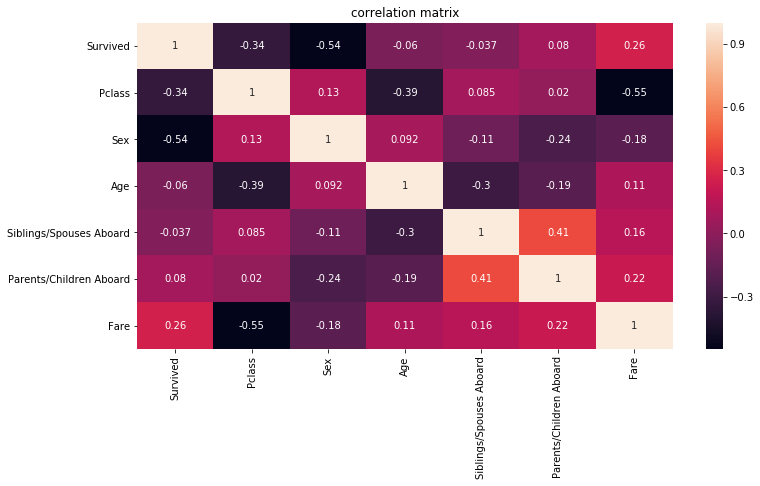

In [7]:
corrmat = data_new.corr()
top_index = corrmat.index
plt.figure(figsize=(12,6))
sns.heatmap(data_new[top_index].corr(), annot=True)
plt.title('correlation matrix')


In [8]:
data_new1 = data_new.drop(['Pclass', 'Sex'], axis='columns')
data_new1

,Survived,Age,Siblings/Spouses Aboard,Parents/Children Aboard,Fare
0,0,22.0,1,0,7.2500
1,1,38.0,1,0,71.2833
2,1,26.0,0,0,7.9250
3,1,35.0,1,0,53.1000
4,0,35.0,0,0,8.0500
...,...,...,...,...,...
882,0,27.0,0,0,13.0000
883,1,19.0,0,0,30.0000
884,0,7.0,1,2,23.4500
885,1,26.0,0,0,30.0000


In [24]:
dataset = data_new1.values
dataset

array([[ 0.    , 22.    ,  1.    ,  0.    ,  7.25  ],
       [ 1.    , 38.    ,  1.    ,  0.    , 71.2833],
       [ 1.    , 26.    ,  0.    ,  0.    ,  7.925 ],
       ...,
       [ 0.    ,  7.    ,  1.    ,  2.    , 23.45  ],
       [ 1.    , 26.    ,  0.    ,  0.    , 30.    ],
       [ 0.    , 32.    ,  0.    ,  0.    ,  7.75  ]])

In [25]:
features = dataset[:,1:]
target = dataset[:,0]

In [26]:
features

array([[22.    ,  1.    ,  0.    ,  7.25  ],
       [38.    ,  1.    ,  0.    , 71.2833],
       [26.    ,  0.    ,  0.    ,  7.925 ],
       ...,
       [ 7.    ,  1.    ,  2.    , 23.45  ],
       [26.    ,  0.    ,  0.    , 30.    ],
       [32.    ,  0.    ,  0.    ,  7.75  ]])

In [27]:
target

array([0., 1., 1., 1., 0., 0., 0., 0., 1., 1., 1., 1., 0., 0., 0., 1., 0.,
       1., 0., 1., 0., 1., 1., 1., 0., 1., 0., 0., 1., 0., 0., 1., 1., 0.,
       0., 0., 1., 0., 0., 1., 0., 0., 1., 1., 0., 0., 1., 0., 0., 0., 0.,
       1., 1., 0., 1., 1., 0., 1., 0., 0., 1., 0., 0., 0., 1., 1., 0., 1.,
       0., 0., 0., 0., 0., 1., 0., 0., 0., 1., 1., 0., 1., 1., 0., 1., 1.,
       0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 1., 1., 0., 0., 0., 0.,
       0., 0., 0., 1., 1., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 1., 0., 1., 0., 1., 1., 0., 0., 0., 0., 1., 0., 0., 1.,
       0., 0., 0., 0., 1., 1., 0., 0., 0., 1., 0., 0., 0., 0., 1., 0., 0.,
       0., 0., 1., 0., 0., 0., 0., 1., 0., 0., 0., 1., 1., 0., 0., 0., 0.,
       0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 1., 0., 1., 1.,
       0., 0., 1., 0., 1., 1., 1., 1., 0., 0., 1., 0., 0., 0., 0., 0., 1.,
       0., 0., 1., 1., 1., 0., 1., 0., 0., 0., 1., 1., 0., 1., 0., 1., 0.,
       0., 0., 1., 0., 1.

In [28]:
x_train, x_test, y_train, y_test = train_test_split(features, target, test_size=0.2)

In [30]:
model = Sequential()
model.add(Dense(15, input_dim=4, activation='relu'))
model.add(Dense(10, activation='relu'))
model.add(Dense(8, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(1, activation='sigmoid'))

In [36]:
from keras.layers import Activation
from keras.metrics import binary_crossentropy, accuracy
from keras.optimizers import Adam

In [37]:
model.compile(Adam(lr=0.001), loss='binary_crossentropy', metrics=['accuracy'])

In [38]:
model.fit(x_train, y_train, epochs=1000, validation_split=0.2, verbose=2)

Train on 567 samples, validate on 142 samples
Epoch 1/1000
 - 0s - loss: 6.7018 - accuracy: 0.4515 - val_loss: 4.5325 - val_accuracy: 0.3873
Epoch 2/1000
 - 0s - loss: 3.6718 - accuracy: 0.4268 - val_loss: 1.2107 - val_accuracy: 0.3732
Epoch 3/1000
 - 0s - loss: 2.1288 - accuracy: 0.4621 - val_loss: 0.8293 - val_accuracy: 0.6197
Epoch 4/1000
 - 0s - loss: 2.0549 - accuracy: 0.5785 - val_loss: 1.0733 - val_accuracy: 0.6408
Epoch 5/1000
 - 0s - loss: 1.6163 - accuracy: 0.6208 - val_loss: 0.9601 - val_accuracy: 0.6549
Epoch 6/1000
 - 0s - loss: 1.4985 - accuracy: 0.6279 - val_loss: 1.1681 - val_accuracy: 0.6620
Epoch 7/1000
 - 0s - loss: 1.5138 - accuracy: 0.6120 - val_loss: 1.0795 - val_accuracy: 0.6549
Epoch 8/1000
 - 0s - loss: 1.2933 - accuracy: 0.6173 - val_loss: 0.9583 - val_accuracy: 0.6620
Epoch 9/1000
 - 0s - loss: 1.2778 - accuracy: 0.5961 - val_loss: 0.9345 - val_accuracy: 0.6690
Epoch 10/1000
 - 0s - loss: 1.1386 - accuracy: 0.6226 - val_loss: 0.8633 - val_accuracy: 0.6690
Epo

Epoch 86/1000
 - 0s - loss: 0.5803 - accuracy: 0.6966 - val_loss: 0.6179 - val_accuracy: 0.6479
Epoch 87/1000
 - 0s - loss: 0.6052 - accuracy: 0.6931 - val_loss: 0.6111 - val_accuracy: 0.6831
Epoch 88/1000
 - 0s - loss: 0.5889 - accuracy: 0.7072 - val_loss: 0.6332 - val_accuracy: 0.6831
Epoch 89/1000
 - 0s - loss: 0.5984 - accuracy: 0.6966 - val_loss: 0.6202 - val_accuracy: 0.6901
Epoch 90/1000
 - 0s - loss: 0.5898 - accuracy: 0.6984 - val_loss: 0.6375 - val_accuracy: 0.6901
Epoch 91/1000
 - 0s - loss: 0.5851 - accuracy: 0.7072 - val_loss: 0.6090 - val_accuracy: 0.6761
Epoch 92/1000
 - 0s - loss: 0.5880 - accuracy: 0.6984 - val_loss: 0.6124 - val_accuracy: 0.6761
Epoch 93/1000
 - 0s - loss: 0.5893 - accuracy: 0.7019 - val_loss: 0.6384 - val_accuracy: 0.6761
Epoch 94/1000
 - 0s - loss: 0.5908 - accuracy: 0.6896 - val_loss: 0.6039 - val_accuracy: 0.6338
Epoch 95/1000
 - 0s - loss: 0.5968 - accuracy: 0.6878 - val_loss: 0.6268 - val_accuracy: 0.6831
Epoch 96/1000
 - 0s - loss: 0.5796 - acc

Epoch 171/1000
 - 0s - loss: 0.5780 - accuracy: 0.7055 - val_loss: 0.5978 - val_accuracy: 0.6690
Epoch 172/1000
 - 0s - loss: 0.5852 - accuracy: 0.7178 - val_loss: 0.5969 - val_accuracy: 0.6690
Epoch 173/1000
 - 0s - loss: 0.5705 - accuracy: 0.7213 - val_loss: 0.6147 - val_accuracy: 0.6761
Epoch 174/1000
 - 0s - loss: 0.5834 - accuracy: 0.7143 - val_loss: 0.6025 - val_accuracy: 0.6831
Epoch 175/1000
 - 0s - loss: 0.5797 - accuracy: 0.7125 - val_loss: 0.6022 - val_accuracy: 0.6690
Epoch 176/1000
 - 0s - loss: 0.5778 - accuracy: 0.7143 - val_loss: 0.6073 - val_accuracy: 0.6690
Epoch 177/1000
 - 0s - loss: 0.5819 - accuracy: 0.7160 - val_loss: 0.6084 - val_accuracy: 0.6690
Epoch 178/1000
 - 0s - loss: 0.5905 - accuracy: 0.7125 - val_loss: 0.6011 - val_accuracy: 0.6690
Epoch 179/1000
 - 0s - loss: 0.5639 - accuracy: 0.7125 - val_loss: 0.6186 - val_accuracy: 0.6761
Epoch 180/1000
 - 0s - loss: 0.5892 - accuracy: 0.7143 - val_loss: 0.6047 - val_accuracy: 0.6831
Epoch 181/1000
 - 0s - loss: 0

Epoch 256/1000
 - 0s - loss: 0.5670 - accuracy: 0.7231 - val_loss: 0.6059 - val_accuracy: 0.6549
Epoch 257/1000
 - 0s - loss: 0.5782 - accuracy: 0.7196 - val_loss: 0.6106 - val_accuracy: 0.6549
Epoch 258/1000
 - 0s - loss: 0.5702 - accuracy: 0.7302 - val_loss: 0.6134 - val_accuracy: 0.6549
Epoch 259/1000
 - 0s - loss: 0.5761 - accuracy: 0.7266 - val_loss: 0.6163 - val_accuracy: 0.6549
Epoch 260/1000
 - 0s - loss: 0.5621 - accuracy: 0.7319 - val_loss: 0.6168 - val_accuracy: 0.6761
Epoch 261/1000
 - 0s - loss: 0.5682 - accuracy: 0.7354 - val_loss: 0.6152 - val_accuracy: 0.6690
Epoch 262/1000
 - 0s - loss: 0.5664 - accuracy: 0.7337 - val_loss: 0.6138 - val_accuracy: 0.6690
Epoch 263/1000
 - 0s - loss: 0.5680 - accuracy: 0.7213 - val_loss: 0.6203 - val_accuracy: 0.6690
Epoch 264/1000
 - 0s - loss: 0.5643 - accuracy: 0.7266 - val_loss: 0.6115 - val_accuracy: 0.6761
Epoch 265/1000
 - 0s - loss: 0.5690 - accuracy: 0.7284 - val_loss: 0.6172 - val_accuracy: 0.6549
Epoch 266/1000
 - 0s - loss: 0

Epoch 341/1000
 - 0s - loss: 0.5598 - accuracy: 0.7266 - val_loss: 0.6141 - val_accuracy: 0.6620
Epoch 342/1000
 - 0s - loss: 0.5617 - accuracy: 0.7284 - val_loss: 0.6166 - val_accuracy: 0.6761
Epoch 343/1000
 - 0s - loss: 0.5587 - accuracy: 0.7213 - val_loss: 0.6157 - val_accuracy: 0.6761
Epoch 344/1000
 - 0s - loss: 0.5638 - accuracy: 0.7266 - val_loss: 0.6202 - val_accuracy: 0.6831
Epoch 345/1000
 - 0s - loss: 0.5737 - accuracy: 0.7108 - val_loss: 0.6147 - val_accuracy: 0.6620
Epoch 346/1000
 - 0s - loss: 0.5531 - accuracy: 0.7354 - val_loss: 0.6178 - val_accuracy: 0.6761
Epoch 347/1000
 - 0s - loss: 0.5673 - accuracy: 0.7284 - val_loss: 0.6178 - val_accuracy: 0.6761
Epoch 348/1000
 - 0s - loss: 0.5647 - accuracy: 0.7266 - val_loss: 0.6149 - val_accuracy: 0.6690
Epoch 349/1000
 - 0s - loss: 0.5577 - accuracy: 0.7302 - val_loss: 0.6219 - val_accuracy: 0.6901
Epoch 350/1000
 - 0s - loss: 0.5681 - accuracy: 0.7213 - val_loss: 0.6142 - val_accuracy: 0.6620
Epoch 351/1000
 - 0s - loss: 0

Epoch 426/1000
 - 0s - loss: 0.5666 - accuracy: 0.7196 - val_loss: 0.6169 - val_accuracy: 0.6831
Epoch 427/1000
 - 0s - loss: 0.5582 - accuracy: 0.7266 - val_loss: 0.5979 - val_accuracy: 0.6690
Epoch 428/1000
 - 0s - loss: 0.5558 - accuracy: 0.7284 - val_loss: 0.6141 - val_accuracy: 0.6761
Epoch 429/1000
 - 0s - loss: 0.5578 - accuracy: 0.7196 - val_loss: 0.6124 - val_accuracy: 0.6831
Epoch 430/1000
 - 0s - loss: 0.5542 - accuracy: 0.7354 - val_loss: 0.6095 - val_accuracy: 0.6831
Epoch 431/1000
 - 0s - loss: 0.5646 - accuracy: 0.7390 - val_loss: 0.6075 - val_accuracy: 0.6831
Epoch 432/1000
 - 0s - loss: 0.5602 - accuracy: 0.7213 - val_loss: 0.5977 - val_accuracy: 0.6620
Epoch 433/1000
 - 0s - loss: 0.5550 - accuracy: 0.7443 - val_loss: 0.6190 - val_accuracy: 0.6901
Epoch 434/1000
 - 0s - loss: 0.5613 - accuracy: 0.7302 - val_loss: 0.6230 - val_accuracy: 0.6831
Epoch 435/1000
 - 0s - loss: 0.5531 - accuracy: 0.7284 - val_loss: 0.6164 - val_accuracy: 0.6831
Epoch 436/1000
 - 0s - loss: 0

Epoch 511/1000
 - 0s - loss: 0.5504 - accuracy: 0.7390 - val_loss: 0.5936 - val_accuracy: 0.6831
Epoch 512/1000
 - 0s - loss: 0.5578 - accuracy: 0.7302 - val_loss: 0.6132 - val_accuracy: 0.6901
Epoch 513/1000
 - 0s - loss: 0.5635 - accuracy: 0.7213 - val_loss: 0.5996 - val_accuracy: 0.6901
Epoch 514/1000
 - 0s - loss: 0.5503 - accuracy: 0.7284 - val_loss: 0.6096 - val_accuracy: 0.6831
Epoch 515/1000
 - 0s - loss: 0.5557 - accuracy: 0.7213 - val_loss: 0.5922 - val_accuracy: 0.6761
Epoch 516/1000
 - 0s - loss: 0.5559 - accuracy: 0.7196 - val_loss: 0.5880 - val_accuracy: 0.6761
Epoch 517/1000
 - 0s - loss: 0.5641 - accuracy: 0.7178 - val_loss: 0.6016 - val_accuracy: 0.6831
Epoch 518/1000
 - 0s - loss: 0.5607 - accuracy: 0.7231 - val_loss: 0.6091 - val_accuracy: 0.6831
Epoch 519/1000
 - 0s - loss: 0.5648 - accuracy: 0.7319 - val_loss: 0.5953 - val_accuracy: 0.6690
Epoch 520/1000
 - 0s - loss: 0.5572 - accuracy: 0.7302 - val_loss: 0.6226 - val_accuracy: 0.6901
Epoch 521/1000
 - 0s - loss: 0

Epoch 596/1000
 - 0s - loss: 0.5522 - accuracy: 0.7231 - val_loss: 0.6296 - val_accuracy: 0.6831
Epoch 597/1000
 - 0s - loss: 0.5507 - accuracy: 0.7372 - val_loss: 0.6239 - val_accuracy: 0.6901
Epoch 598/1000
 - 0s - loss: 0.5507 - accuracy: 0.7407 - val_loss: 0.6060 - val_accuracy: 0.6901
Epoch 599/1000
 - 0s - loss: 0.5516 - accuracy: 0.7354 - val_loss: 0.6136 - val_accuracy: 0.6901
Epoch 600/1000
 - 0s - loss: 0.5427 - accuracy: 0.7443 - val_loss: 0.6264 - val_accuracy: 0.6831
Epoch 601/1000
 - 0s - loss: 0.5388 - accuracy: 0.7460 - val_loss: 0.6477 - val_accuracy: 0.6972
Epoch 602/1000
 - 0s - loss: 0.5561 - accuracy: 0.7372 - val_loss: 0.6079 - val_accuracy: 0.6761
Epoch 603/1000
 - 0s - loss: 0.5627 - accuracy: 0.7231 - val_loss: 0.6126 - val_accuracy: 0.7042
Epoch 604/1000
 - 0s - loss: 0.5534 - accuracy: 0.7284 - val_loss: 0.5993 - val_accuracy: 0.6831
Epoch 605/1000
 - 0s - loss: 0.5514 - accuracy: 0.7302 - val_loss: 0.6110 - val_accuracy: 0.6831
Epoch 606/1000
 - 0s - loss: 0

Epoch 681/1000
 - 0s - loss: 0.5394 - accuracy: 0.7407 - val_loss: 0.6280 - val_accuracy: 0.6972
Epoch 682/1000
 - 0s - loss: 0.5383 - accuracy: 0.7372 - val_loss: 0.6115 - val_accuracy: 0.6972
Epoch 683/1000
 - 0s - loss: 0.5431 - accuracy: 0.7354 - val_loss: 0.6398 - val_accuracy: 0.6901
Epoch 684/1000
 - 0s - loss: 0.5432 - accuracy: 0.7354 - val_loss: 0.6297 - val_accuracy: 0.6901
Epoch 685/1000
 - 0s - loss: 0.5594 - accuracy: 0.7125 - val_loss: 0.6191 - val_accuracy: 0.6831
Epoch 686/1000
 - 0s - loss: 0.5582 - accuracy: 0.7284 - val_loss: 0.6246 - val_accuracy: 0.6972
Epoch 687/1000
 - 0s - loss: 0.5572 - accuracy: 0.7337 - val_loss: 0.6166 - val_accuracy: 0.6831
Epoch 688/1000
 - 0s - loss: 0.5496 - accuracy: 0.7302 - val_loss: 0.6080 - val_accuracy: 0.6831
Epoch 689/1000
 - 0s - loss: 0.5485 - accuracy: 0.7090 - val_loss: 0.6213 - val_accuracy: 0.6831
Epoch 690/1000
 - 0s - loss: 0.5503 - accuracy: 0.7337 - val_loss: 0.6241 - val_accuracy: 0.6831
Epoch 691/1000
 - 0s - loss: 0

Epoch 766/1000
 - 0s - loss: 0.5446 - accuracy: 0.7443 - val_loss: 0.5916 - val_accuracy: 0.6761
Epoch 767/1000
 - 0s - loss: 0.5511 - accuracy: 0.7390 - val_loss: 0.6035 - val_accuracy: 0.6761
Epoch 768/1000
 - 0s - loss: 0.5387 - accuracy: 0.7407 - val_loss: 0.6094 - val_accuracy: 0.6761
Epoch 769/1000
 - 0s - loss: 0.5449 - accuracy: 0.7478 - val_loss: 0.5885 - val_accuracy: 0.6761
Epoch 770/1000
 - 0s - loss: 0.5490 - accuracy: 0.7354 - val_loss: 0.6319 - val_accuracy: 0.6761
Epoch 771/1000
 - 0s - loss: 0.5432 - accuracy: 0.7213 - val_loss: 0.5946 - val_accuracy: 0.6831
Epoch 772/1000
 - 0s - loss: 0.5472 - accuracy: 0.7390 - val_loss: 0.6095 - val_accuracy: 0.6831
Epoch 773/1000
 - 0s - loss: 0.5556 - accuracy: 0.7266 - val_loss: 0.5907 - val_accuracy: 0.6690
Epoch 774/1000
 - 0s - loss: 0.5409 - accuracy: 0.7337 - val_loss: 0.6055 - val_accuracy: 0.6761
Epoch 775/1000
 - 0s - loss: 0.5453 - accuracy: 0.7284 - val_loss: 0.6023 - val_accuracy: 0.6761
Epoch 776/1000
 - 0s - loss: 0

Epoch 851/1000
 - 0s - loss: 0.5471 - accuracy: 0.7337 - val_loss: 0.6295 - val_accuracy: 0.6761
Epoch 852/1000
 - 0s - loss: 0.5443 - accuracy: 0.7354 - val_loss: 0.6027 - val_accuracy: 0.6690
Epoch 853/1000
 - 0s - loss: 0.5281 - accuracy: 0.7549 - val_loss: 0.6237 - val_accuracy: 0.6761
Epoch 854/1000
 - 0s - loss: 0.5349 - accuracy: 0.7407 - val_loss: 0.6232 - val_accuracy: 0.6690
Epoch 855/1000
 - 0s - loss: 0.5427 - accuracy: 0.7319 - val_loss: 0.6417 - val_accuracy: 0.6761
Epoch 856/1000
 - 0s - loss: 0.5460 - accuracy: 0.7390 - val_loss: 0.5918 - val_accuracy: 0.6901
Epoch 857/1000
 - 0s - loss: 0.5398 - accuracy: 0.7284 - val_loss: 0.6407 - val_accuracy: 0.6901
Epoch 858/1000
 - 0s - loss: 0.5334 - accuracy: 0.7513 - val_loss: 0.6072 - val_accuracy: 0.6690
Epoch 859/1000
 - 0s - loss: 0.5370 - accuracy: 0.7443 - val_loss: 0.6243 - val_accuracy: 0.6761
Epoch 860/1000
 - 0s - loss: 0.5451 - accuracy: 0.7266 - val_loss: 0.6005 - val_accuracy: 0.6690
Epoch 861/1000
 - 0s - loss: 0

Epoch 936/1000
 - 0s - loss: 0.5380 - accuracy: 0.7425 - val_loss: 0.6429 - val_accuracy: 0.6690
Epoch 937/1000
 - 0s - loss: 0.5373 - accuracy: 0.7302 - val_loss: 0.6068 - val_accuracy: 0.6761
Epoch 938/1000
 - 0s - loss: 0.5312 - accuracy: 0.7390 - val_loss: 0.5953 - val_accuracy: 0.6690
Epoch 939/1000
 - 0s - loss: 0.5276 - accuracy: 0.7425 - val_loss: 0.6143 - val_accuracy: 0.6690
Epoch 940/1000
 - 0s - loss: 0.5381 - accuracy: 0.7249 - val_loss: 0.6032 - val_accuracy: 0.6690
Epoch 941/1000
 - 0s - loss: 0.5426 - accuracy: 0.7390 - val_loss: 0.6037 - val_accuracy: 0.6761
Epoch 942/1000
 - 0s - loss: 0.5416 - accuracy: 0.7249 - val_loss: 0.6197 - val_accuracy: 0.6761
Epoch 943/1000
 - 0s - loss: 0.5453 - accuracy: 0.7284 - val_loss: 0.6038 - val_accuracy: 0.6831
Epoch 944/1000
 - 0s - loss: 0.5501 - accuracy: 0.7284 - val_loss: 0.6430 - val_accuracy: 0.6690
Epoch 945/1000
 - 0s - loss: 0.5336 - accuracy: 0.7478 - val_loss: 0.5960 - val_accuracy: 0.6690
Epoch 946/1000
 - 0s - loss: 0

In [39]:
pred_cls = model.predict_classes(x_test, verbose=0)
pred_cls

array([[0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [1],
       [0],
       [1],
       [0],
       [1],
       [0],
       [0],
       [0],
       [0],
       [0],
       [1],
       [1],
       [1],
       [0],
       [0],
       [0],
       [0],
       [1],
       [0],
       [0],
       [0],
       [0],
       [1],
       [1],
       [0],
       [0],
       [1],
       [1],
       [0],
       [0],
       [0],
       [1],
       [0],
       [0],
       [1],
       [0],
       [1],
       [0],
       [0],
       [0],
       [1],
       [1],
       [1],
       [0],
       [0],
       [1],
       [1],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [1],
       [0],
       [0],
       [1],
       [0],
       [1],
       [0],
       [0],
       [1],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
    

In [40]:
accuracy_score(pred_cls, y_test)

0.7303370786516854

In [41]:
cm = confusion_matrix(pred_cls, y_test)
cm

array([[96, 32],
       [16, 34]], dtype=int64)

Text(0.5, 1, 'confusion matrix')

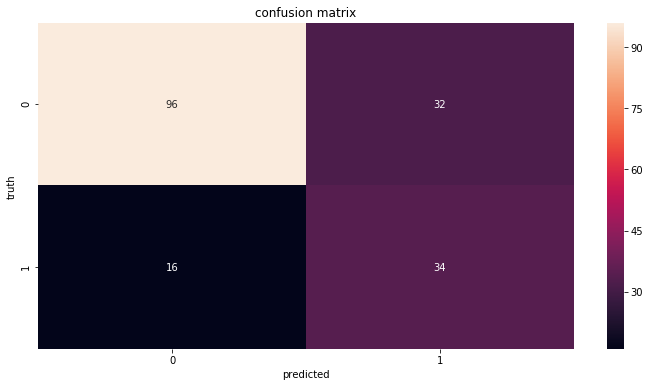

In [42]:
plt.figure(figsize=(12,6))
sns.heatmap(cm, annot=True)
plt.xlabel('predicted')
plt.ylabel('truth')
plt.title('confusion matrix')

In [43]:
import joblib 
joblib.dump(model, 'E://models//titanic_nn')

['E://models//titanic_nn']